<a href="https://colab.research.google.com/github/LillyMac12/ACGWEP/blob/main/Blank_Event_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing the pyCBC library
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 86.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 139.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 199.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 176.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 204.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 220.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 282.9 MB/s eta 0:00:00
   ━

In [ ]:
#importing specific functions from pyCBC and pylab

%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.strain.strain import lowpass
import matplotlib.pyplot as plt
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.filter import matched_filter
import numpy
from pycbc.filter import sigma
import pycbc.filter
from pycbc.waveform import td_approximants


/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [ ]:
#VARIABLES
#IMRPhenomD
#SEOBNRv4_opt
#IMRPhenomXHM
#IMRPhenomXPHM

Event = "GW190412"
Detector = "L1"
Template = "IMRPhenomXPHM"
m1 = 30
m2 = 10
ldistance = 2000

# List of approximants
print(td_approximants())


['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2', 'IMRPhenomXP_NRTidalv2', 'IMRPhenomXO4a', 'E

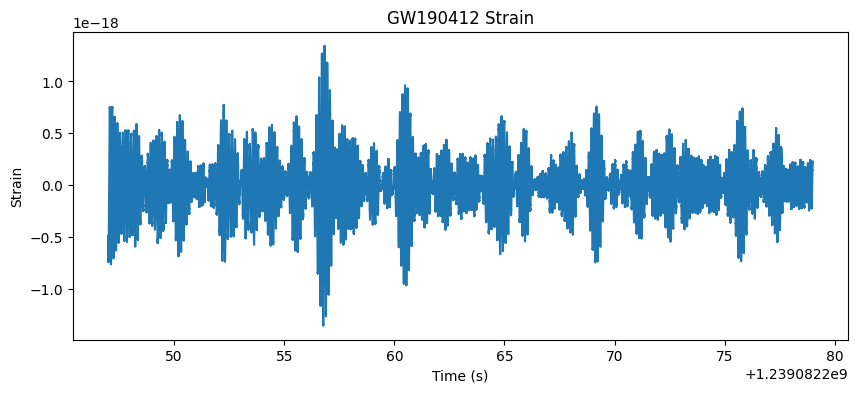

In [ ]:
#plot the strain data for each event

merger = Merger(Event)

strain = merger.strain(Detector)

pylab.figure(figsize=[10, 4])
pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.ylabel("Strain")
pylab.title(Event + " Strain")
pylab.show()

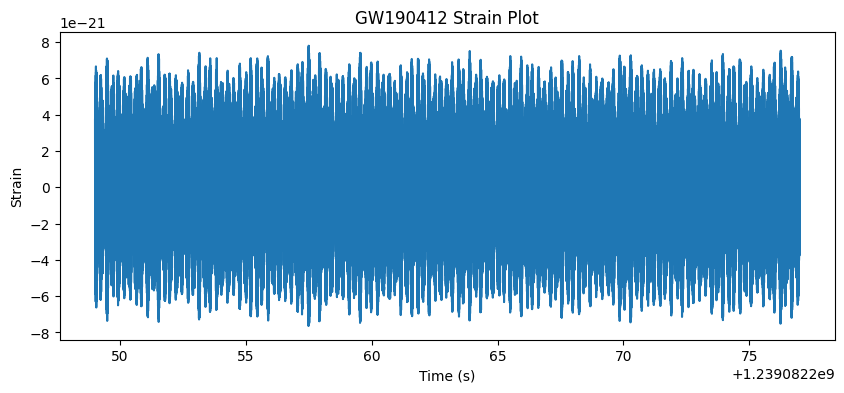

In [ ]:
strain = merger.strain(Detector)
hp = highpass(strain, 30, 8)
ts = lowpass(hp, 1000.0, 8)

strain = resample_to_delta_t(ts, 1.0/2048)
strain = strain.crop(2, 2)

pylab.figure(figsize=[10, 4])
pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.ylabel("Strain")
pylab.title(Event + " Strain Plot")
pylab.show()

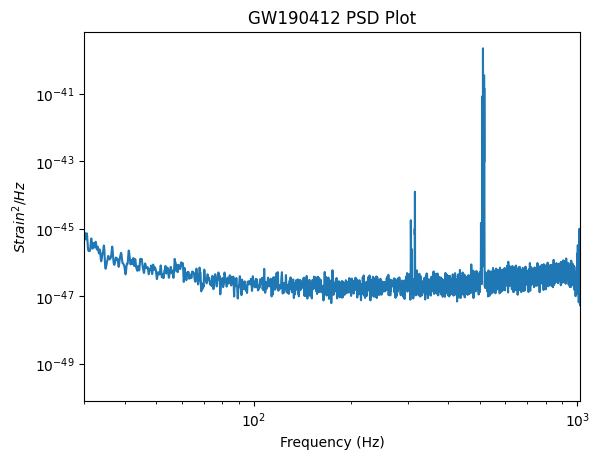

In [ ]:
psd = strain.psd(4)

psd = interpolate(psd, strain.delta_f)

psd = inverse_spectrum_truncation(psd, int(4 * strain.sample_rate),
                                  low_frequency_cutoff=15)

pylab.loglog(psd.sample_frequencies, psd)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.xlim(30, 1024)
pylab.title(Event + " PSD Plot")
pylab.show()

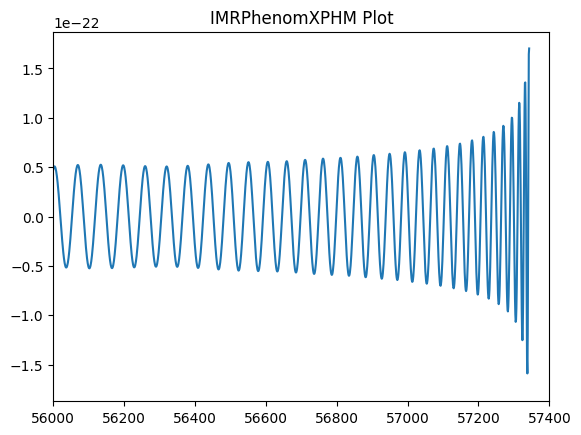

In [ ]:
waveform, hc = get_td_waveform(approximant=Template,
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain.delta_t,
                     distance=ldistance,
                     f_lower=30)
waveform.resize(len(strain))

template = waveform.cyclic_time_shift(waveform.start_time)

pylab.plot(template)
pylab.xlim(56000,57400)
pylab.title(Template + " Plot")
pylab.show()

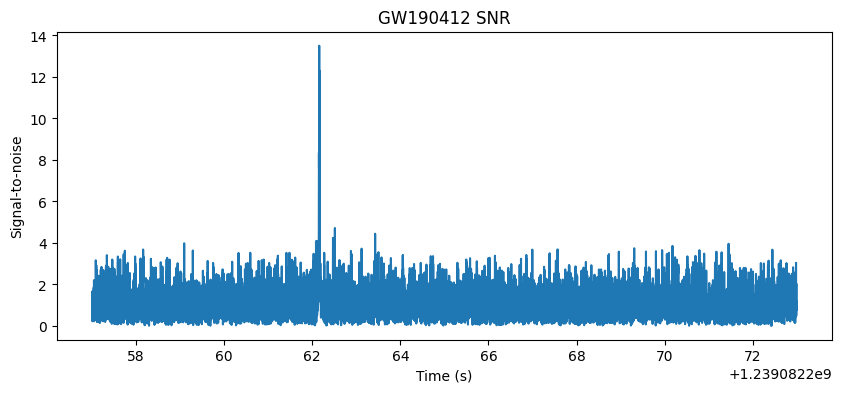

Signal found at 1239082262.1572266s with SNR 13.502425092204868


In [ ]:
#run through the matched filtering process using SNR, plot both

snr = matched_filter(template, strain,
                     psd=psd, low_frequency_cutoff=20)

#has to be cropped
snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.title(Event + " SNR")
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("Signal found at {}s with SNR {}".format(time,
                                                    abs(snrp)))


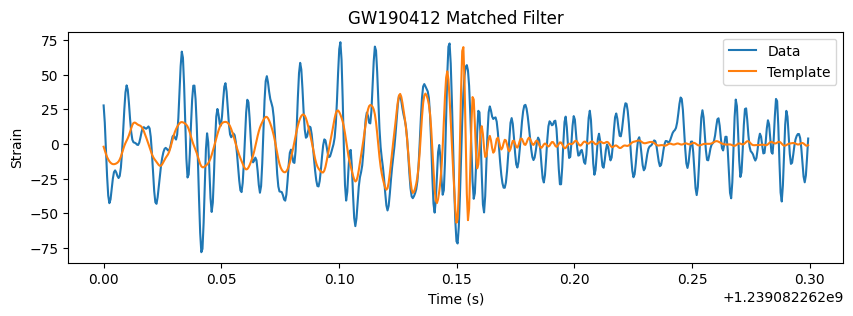

In [ ]:
# PROCESS

#lining up of template and data where the matched filtering found a match

dt = time - strain.start_time
aligned = template.cyclic_time_shift(dt)

aligned /= sigma(aligned, psd=psd, low_frequency_cutoff=20.0)

aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = strain.start_time

#whitening both the template and the data
white_data = (strain.to_frequencyseries() / psd**0.5).to_timeseries()

#smooth the template where it "turns on" to aviod a transient
#this is done because of the sharp "on" of the waveform template
tapered = aligned.highpass_fir(30, 512, remove_corrupted=False)
white_template = (tapered.to_frequencyseries() / psd**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

# select the time around the merger
white_data = white_data.time_slice(merger.time-.2, merger.time+.1)
white_template = white_template.time_slice(merger.time-.2, merger.time+.1)

pylab.figure(figsize=[10, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")
pylab.title(Event + " Matched Filter")
pylab.xlabel("Time (s)")
pylab.ylabel("Strain")
pylab.legend()
pylab.show()


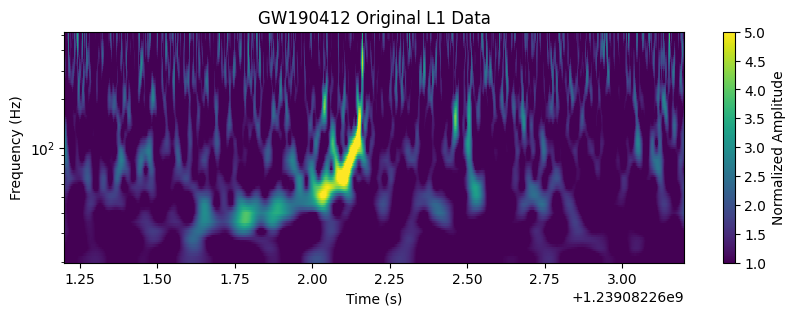

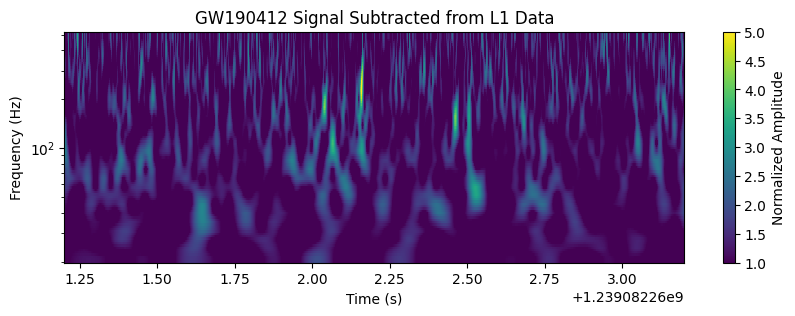

In [ ]:
#plot both normal spectrogram and spectrogram with the signal subtracted
subtracted = strain - aligned

for data, title in [(strain, Event + " Original " + Detector + " Data"),
                    (subtracted, Event + " Signal Subtracted from " + Detector + " Data")]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20, 512))
    pylab.figure(figsize=[10, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=5)
    pylab.colorbar(label="Normalized Amplitude")
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(merger.time - 1, merger.time + 1)
    pylab.show()
